## Import Libraries

In [3]:
from scipy import signal
import matplotlib.pyplot as plt
import math
import control
import numpy as np

## Generate a signal

In [65]:
A1 = 2.5
A2 = 0.2
f1 = 200 # 200.000bps minimum baudrate
f2 = 50

t = np.linspace(0,0.1,1000)
pwm = signal.square(f1 * np.pi * t)
y = A1*pwm + 2.5

mu, sigma = 0, 0.8 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)

total_signal = y + s

## Compute Fourier Transform of total signal

In [66]:
samplingFreq = 1000; 
yhat = np.fft.fft(total_signal)
fcycles = np.fft.fftfreq(len(t),d=1.0/samplingFreq)

## Plot input signal

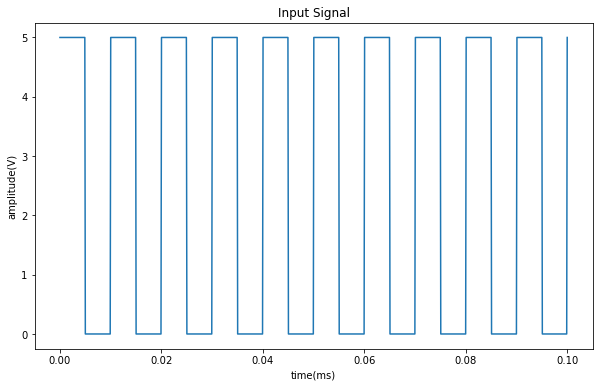

In [93]:
plt.figure(figsize=(10,6))
plt.plot(t,y)
plt.title("Input Signal")
plt.ylabel("amplitude(V)")
plt.xlabel("time(ms)")
plt.show()

## Plot total signal (input + noise)

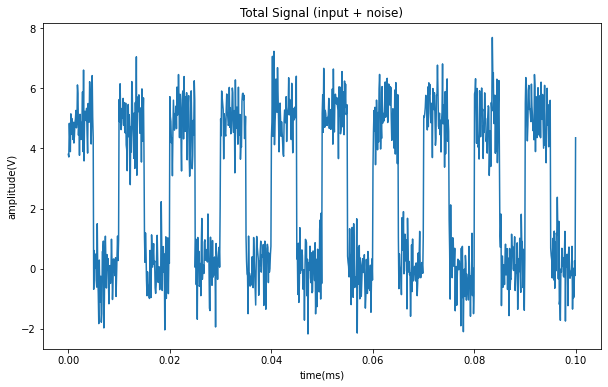

In [94]:
plt.figure(figsize=(10,6))
plt.plot(t,total_signal)
plt.title("Total Signal (input + noise)")
plt.ylabel("amplitude(V)")
plt.xlabel("time(ms)")
plt.show()

## Signal frequency spectrum

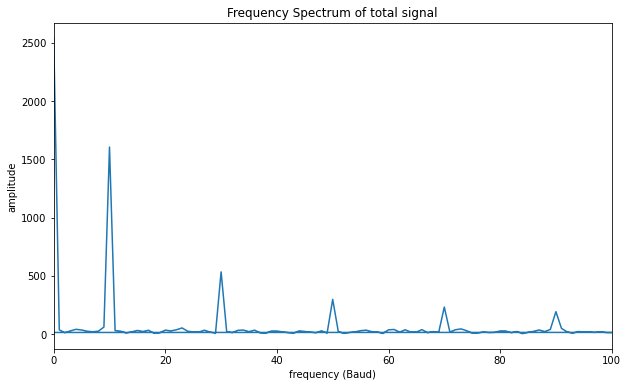

In [98]:
plt.figure(figsize=(10,6))
plt.plot(fcycles,np.absolute(yhat))
plt.title("Frequency Spectrum of total signal")
plt.xlim([0,100])
plt.ylabel("amplitude");
plt.xlabel("frequency (Baud)");
plt.show()

## Low-Pass Filter

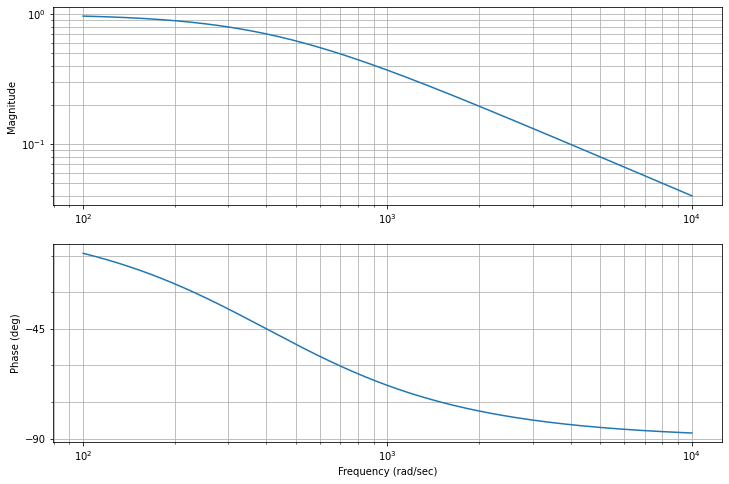

In [83]:
w0 = 400
num = w0        
den = [1,w0]     
sys_L = control.tf(num, den)
sys_L
plt.figure(figsize=(12,8))
mag, phase, omega = control.bode_plot(sys_L, Hz=False)

In [85]:
#we use scipy package now (to compute coefficients)
dt = 1.0/samplingFreq;
lowPass = signal.TransferFunction(num,den)
discreteLowPass = lowPass.to_discrete(dt,method='gbt',alpha=0.5)
discreteLowPass

#print(type(discreteLowPass))
b = discreteLowPass.num;
a = -discreteLowPass.den;
print("b :", b)
print("a: ", a[1:])

b : [0.16666667 0.16666667]
a:  [0.66666667]


In [86]:
# Filter the signal
yfilter = np.zeros(len(total_signal))
for i in range(3,len(total_signal)):
    yfilter[i] = a[1]*yfilter[i-1] + b[0]*total_signal[i] + b[1]*total_signal[i-1]

## Plotting filtered signal 

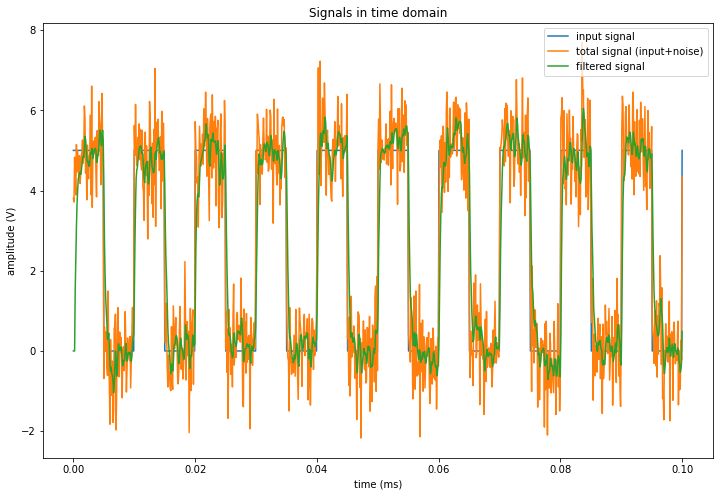

In [99]:
plt.figure(figsize=(12,8))
plt.xlabel("time (ms)")
plt.ylabel("amplitude (V)")
plt.title("Signals in time domain")
plt.plot(t,y)
plt.plot(t,total_signal)
plt.plot(t,yfilter)
plt.legend(['input signal', 'total signal (input+noise)', 'filtered signal'])

## Generate Fourier Transform

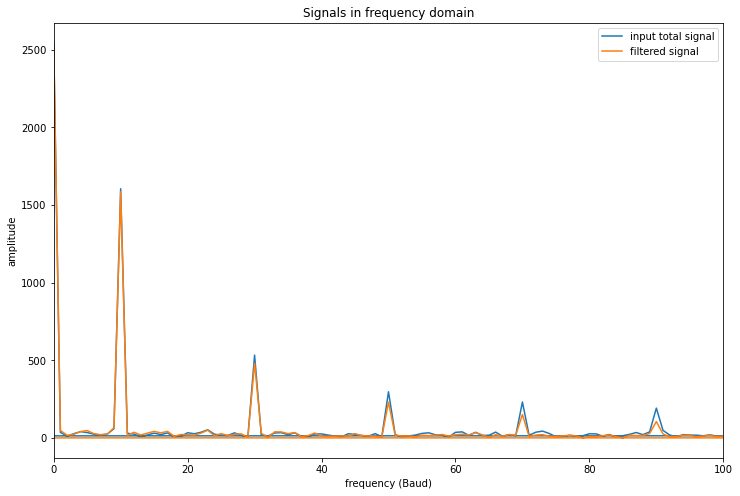

In [97]:
X = np.fft.fft(yfilter)
fcycles = np.fft.fftfreq(len(t),d=1.0/samplingFreq)

plt.figure(figsize=(12,8))
plt.plot(fcycles,np.absolute(yhat))
plt.plot(fcycles,np.absolute(X))
plt.xlim([0,100])
plt.title("Signals in frequency domain")
plt.xlabel("frequency (Baud)")
plt.ylabel("amplitude")
plt.legend(['input total signal', 'filtered signal'])